In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("final_data_Apr10.csv",index_col=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 797
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   viewCount                                         798 non-null    float64
 1   likeCount                                         798 non-null    float64
 2   dislikeCount                                      798 non-null    float64
 3   num_days_since_pub                                798 non-null    float64
 4   viewcounts_weighted                               798 non-null    float64
 5   like_count_weighted                               798 non-null    float64
 6   dislike_count_weighted                            798 non-null    float64
 7   like_dislike_ratio                                798 non-null    float64
 8   weighted_like_dislike_ratio                       798 non-null    float64
 9   like_dislike_ratio_by

In [77]:
df.action_96.value_counts()

hold    451
buy     181
sell    166
Name: action_96, dtype: int64

In [80]:
166/798

0.20802005012531327

In [56]:
feature_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,31,32,33]

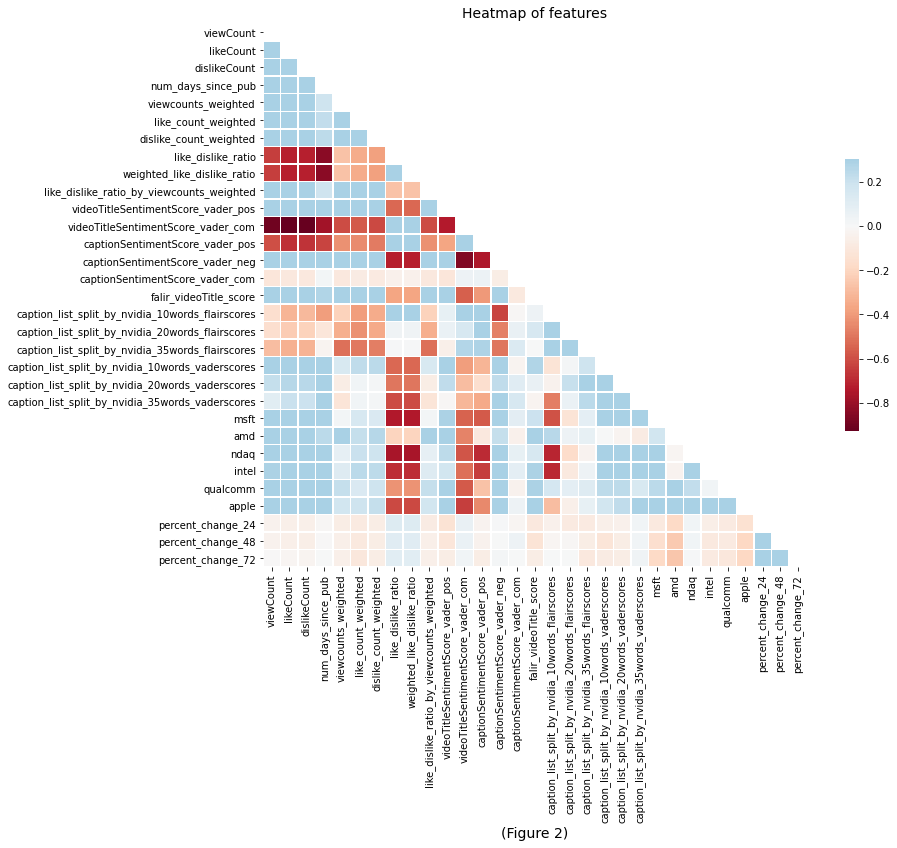

In [75]:
# Visualizing features correlations using heatmap
x = plt.figure(figsize=(14,10))
plt.xlabel("X1",fontsize=14)
plt.ylabel("X2",fontsize=14)
plt.title("Heatmap of features",fontsize=14)
features = df.iloc[:,feature_idx]
corr = features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xlabel("(Figure 2)",fontsize=14)
x.savefig("heatmap.png", bbox_inches='tight', dpi=600)

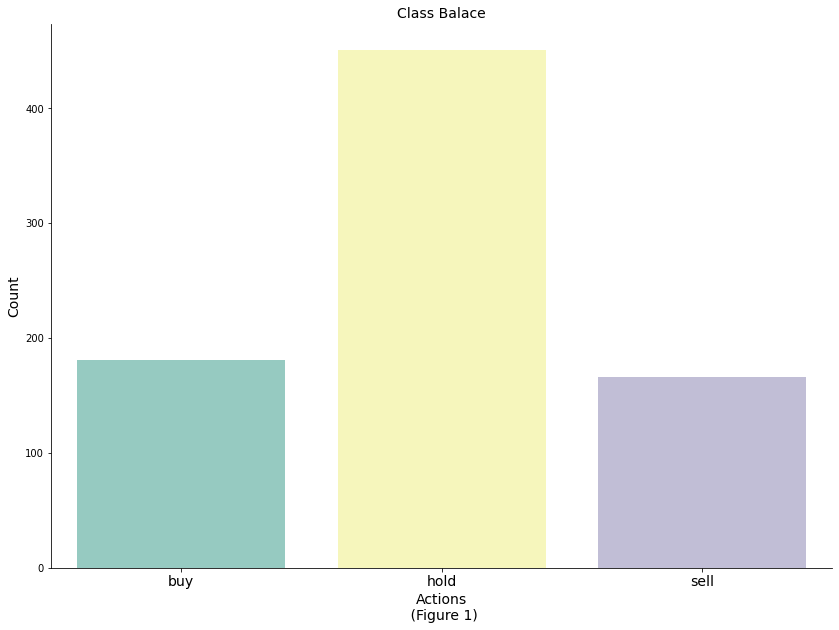

In [73]:
# Visualizing class balance
y = plt.figure(figsize=(14,10))
plt.title("Class Balace",fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
sns.countplot(data=df,x='action_96',palette="Set3")
plt.xlabel("Actions\n (Figure 1)",fontsize=14)
plt.ylabel("Count",fontsize=14)
sns.despine(top=True)
y.savefig("countplot.png", bbox_inches='tight', dpi=600)

In [58]:
# Visualize class in reduced features spaces
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,feature_idx].values
y = df.iloc[:,34]
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [59]:
finalDf = pd.concat([principalDf, y], axis = 1)

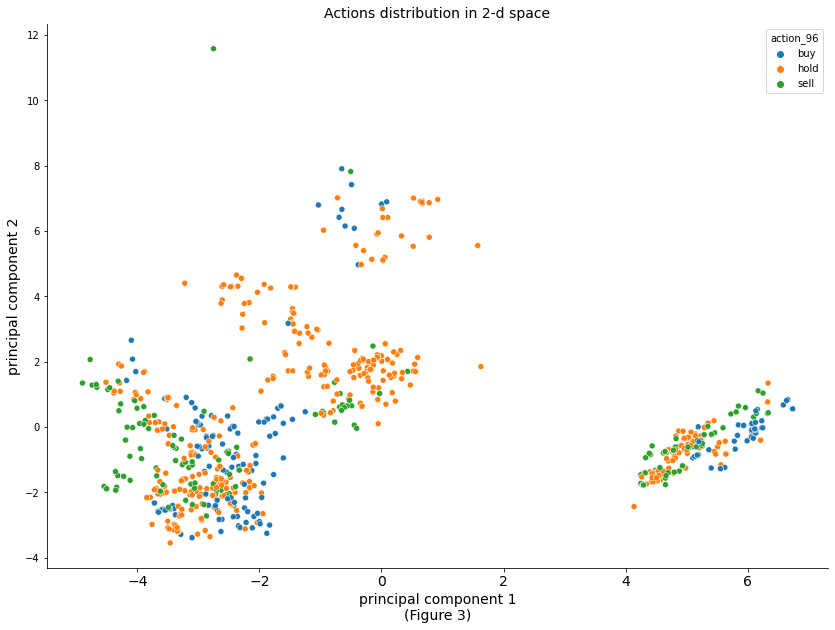

In [74]:
z=plt.figure(figsize=(14,10))
plt.xlabel("principal component 1\n(Figure 3)",fontsize=14)
plt.ylabel("principal component 2",fontsize=14)
plt.title("Actions distribution in 2-d space",fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
sns.despine(top=True)
sns.scatterplot(data=finalDf,x="principal component 1",y="principal component 2",hue="action_96")
z.savefig("PCA.png", bbox_inches='tight', dpi=600)